# Predicting crossfit lift

## Project Overview

CrossFit is a high-intensity fitness program that combines elements of weightlifting, cardio, and gymnastics. It aims to improve overall physical fitness by incorporating constantly varied functional movements performed at a high intensity. At the pinnacle of CrossFit is the CrossFit Games, an annual competition that showcases the world's fittest athletes. The CrossFit Games serve as a platform for elite athletes to test their skills and compete in a wide range of demanding workouts, challenging their strength, speed, power, and mental resilience. In this analysis, we will delve into the performance of CrossFit athletes, examining key factors that contribute to their success in this highly demanding and competitive sport.  

Project Summary

The dataset used in this project was provided by Ulrik Pedersen and can be found on [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/crossfit-athletes).

## Project outline 

 - Title 
    - Subtitle


### Data overview

Cleaned data is imported from <i>A data-based approach to CrossFit</i>.

In [48]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [49]:
os.chdir('C:\\Users\\corne\\OneDrive\\Documents\\DS_Portfolio\\crossfit_project\\crossfit_project')
df = pd.read_pickle('cleaned_cf_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28995 entries, 21 to 422961
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         28995 non-null  object 
 1   gender         28995 non-null  object 
 2   age            28995 non-null  float64
 3   height         28995 non-null  float64
 4   weight         28995 non-null  float64
 5   candj          28995 non-null  float64
 6   snatch         28995 non-null  float64
 7   deadlift       28995 non-null  float64
 8   backsq         28995 non-null  float64
 9   eat            28995 non-null  object 
 10  background     28995 non-null  object 
 11  experience     28995 non-null  object 
 12  schedule       28995 non-null  object 
 13  howlong        28995 non-null  object 
 14  rec            28995 non-null  int32  
 15  high_school    28995 non-null  int32  
 16  college        28995 non-null  int32  
 17  pro            28995 non-null  int32  
 18  no_b

In [50]:
df.head()

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,...,eat_weigh,US,gender_,norm_dl,norm_j,norm_s,norm_bs,total_lift,BMI,bmi_rounded
21,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,...,0,1,1,1.925000,1.175000,0.875000,1.575000,5.550000,27.894029,28.0
22,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,...,0,0,1,1.903409,1.062500,0.761364,1.443182,5.170455,25.253091,25.0
27,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,...,0,1,1,1.955556,1.266667,0.911111,1.800000,5.933333,34.210754,34.0
50,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,...,0,1,1,2.437186,1.341709,1.065327,1.959799,6.804020,27.754559,28.0
60,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,...,0,1,1,2.677419,1.580645,1.161290,2.483871,7.903226,26.605395,27.0


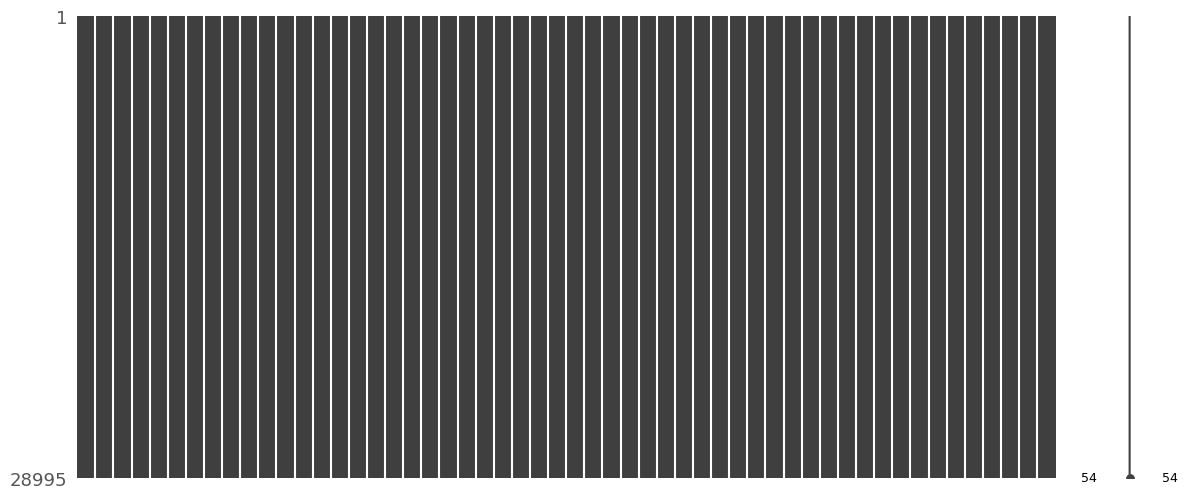

In [51]:
msno.matrix(df, figsize=(14,6),fontsize=11);

## Selecting features for model

Features are selected for use in predictive models. Features that are redundant, have been encoded, or have been engineered into new features are not included in further analyses. Individual event performances are no longer considered, and the target is the total weight lifted normalized by athlete bodyweight.

In [52]:
df_select = df.drop(columns=['region','height','weight','candj','snatch','deadlift','norm_bs', 'norm_dl', 'norm_j', 'norm_s','bmi_rounded','backsq','eat','background','experience','schedule','howlong','gender'])
print('Selected features:\n',df_select.columns.values)

Selected features:
 ['age' 'rec' 'high_school' 'college' 'pro' 'no_background' 'exp_coach'
 'exp_alone' 'exp_courses' 'life_changing' 'exp_trainer' 'exp_level1'
 'exp_start_nr' 'rest_plus' 'rest_minus' 'rest_sched' 'sched_0extra'
 'sched_1extra' 'sched_2extra' 'sched_3extra' 'sched_nr' 'rest_nr'
 'exp_1to2yrs' 'exp_2to4yrs' 'exp_4plus' 'exp_6to12mo' 'exp_lt6mo'
 'eat_conv' 'eat_cheat' 'eat_quality' 'eat_paleo' 'eat_weigh' 'US'
 'gender_' 'total_lift' 'BMI']


### Random forest regression model

A random forest regression model is optimized to predict athlete performance. The random forest regressor randomly selects subsets of the original dataset with replacement, creating multiple training sets known as bootstrap samples. For each bootstrap sample, a decision tree is constructed using a subset of features. The decision tree is built by recursively splitting the data based on the selected features and their optimal thresholds. The final prediction is obtained by aggregating or "bagging" the individual predictions made by each decision tree. Random forest regression models work well with tabular data, large datasets, high-dimensional data, and non-linear data. 

In our modeling we use the root mean squared error is used as a cost function: 

<img src="https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif" />


In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [57]:
#Assigning test and train sets
train_set, test_set = train_test_split(df_select, test_size=0.2, random_state=10)

X_train, y_train = train_set.drop(columns=['total_lift']), train_set['total_lift']
X_test, y_test = test_set.drop(columns=['total_lift']), test_set['total_lift']

In [58]:
#random forest baseline
rnd_clf = RandomForestRegressor(n_estimators=100, max_depth = 12,oob_score=True, random_state=10).fit(X_train,y_train)
rnd_pred = rnd_clf.predict(X_test)
rnd_score = mean_squared_error(y_test, rnd_pred,squared=False)
print(f'Random forest regression model baseline RMSE: \n{rnd_score.round(3)}')

Random forest regression model baseline RMSE: 
0.863


### XGBoost

XGBoost stands for eXtreme gradient boosting and is a gradient boosted trees algorithm. In boosting, trees are sequentially built such that each subsequent tree aims to reduce the errors of the previous tree. Custom XGBoost callbacks were created during model optimizaiton to control learning rate decay, implement early stopping, and plot training results. A schematic of this iterative process is shown in the figure below.
<br>
<img src="https://docs.aws.amazon.com/images/sagemaker/latest/dg/images/xgboost_illustration.png" />
</br>
<br>
Image from [AWS, How XGBoost Works](https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html)
</br>

In addition, several features of XGBoost often lead to superior performance with tabular data. For example, XGBoost grows trees up to a specifiable maximum depth and prunes backwards to improve model fit. This is unlike other algorithms that build trees from the top down and stop once a negative loss is encountered on a single splitting step using a "greedy" algorithm. Additionally, there is built in regularization to avoid overfitting and capacity for parallelization.


In [60]:
#defining custom learning rate decay
def learning_rate_decay(boosting_round): #, num_boost_round):
    learning_rate_start = 0.4
    learning_rate_min = 0.05
    lr_decay = 0.7
    lr = learning_rate_start * np.power(lr_decay, boosting_round)
    return max(learning_rate_min, lr)

lr_callback = xgb.callback.LearningRateScheduler(learning_rate_decay)

In [61]:
#defining callback for plotting XGBoost fit progress, adapting from XGBoost documentation
class Plotting(xgb.callback.TrainingCallback):
    def __init__(self, rounds):
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)
        self.rounds = rounds
        self.lines = {}
        self.fig.show()
        self.x = np.linspace(0, self.rounds, self.rounds)
        plt.ion()

    def _get_key(self, data, metric):
        return f'{data}-{metric}'

    def after_iteration(self, model, epoch, evals_log):
        if not self.lines:
            for data, metric in evals_log.items():
                for metric_name, log in metric.items():
                    key = self._get_key(data, metric_name)
                    expanded = log + [0] * (self.rounds - len(log))
                    self.lines[key],  = self.ax.plot(self.x, expanded, label=key)
                    self.ax.legend()
        else:
            for data, metric in evals_log.items():
                for metric_name, log in metric.items():
                    key = self._get_key(data, metric_name)
                    expanded = log + [0] * (self.rounds - len(log))
                    self.lines[key].set_ydata(expanded)
            self.fig.canvas.draw()
        return False

In [62]:
#defining early stopping callback
es = xgb.callback.EarlyStopping(rounds=100,save_best=True)

Training and evluation RMSE scores:
[0]	train-rmse:3.80923	eval-rmse:3.81266


C:\Users\corne\AppData\Local\Temp\ipykernel_3540\1138537394.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


[100]	train-rmse:0.82707	eval-rmse:0.85081
[200]	train-rmse:0.81175	eval-rmse:0.84634
[300]	train-rmse:0.80052	eval-rmse:0.84445
[400]	train-rmse:0.79081	eval-rmse:0.84269
[500]	train-rmse:0.78215	eval-rmse:0.84173
[600]	train-rmse:0.77440	eval-rmse:0.84027
[700]	train-rmse:0.76668	eval-rmse:0.83956
[800]	train-rmse:0.75950	eval-rmse:0.83924
[900]	train-rmse:0.75302	eval-rmse:0.83926
[1000]	train-rmse:0.74687	eval-rmse:0.83898
[1100]	train-rmse:0.74078	eval-rmse:0.83858
[1123]	train-rmse:0.73955	eval-rmse:0.83868


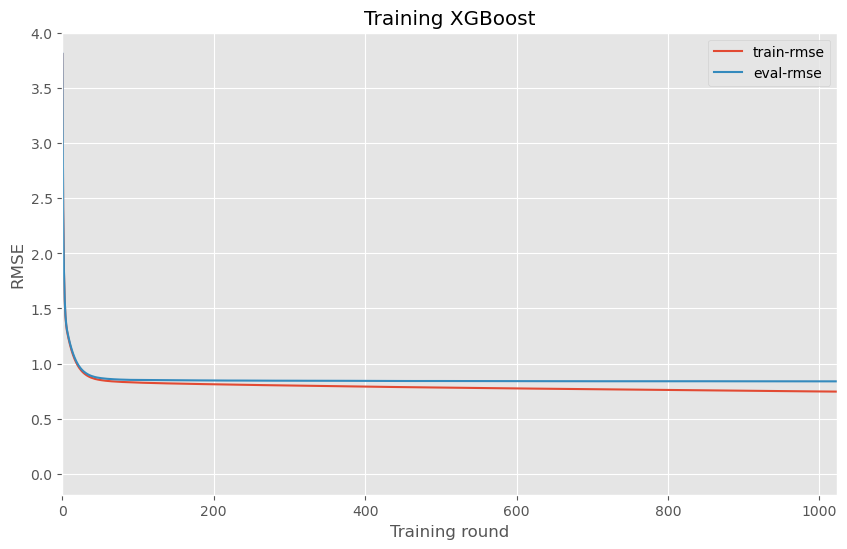

In [63]:
#XGBoost 
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {'max_depth': 4,'subsample':.6,'reg_alpha':0}
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 1500
print('Training and evluation RMSE scores:')
#bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=100,early_stopping_rounds=100,callbacks=[lr_callback, Plotting(num_round)])
bst= xgb.train(param, dtrain, num_round, evals=evallist, verbose_eval=100,callbacks=[lr_callback, Plotting(num_round),es])
plt.xlabel('Training round')
plt.ylabel('RMSE');
plt.title('Training XGBoost')
plt.xlim((0,bst.best_iteration));

In [64]:
bst_pred = bst.predict(dtest)
bst_rmse = mean_squared_error(y_test, bst_pred,squared=False)

print('Best iteration and score:')
bst.best_iteration, round(bst_rmse,3)

Best iteration and score:


(1024, 0.839)

## Conclusion and recommendations

